In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "Investasi-Mobil.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1829027811870265352,Thu Aug 29 08:53:41 +0000 2024,4,@hdrnz Secara teratur BYD melapor kok ke Kemen...,1829079969286459394,NaN,hdrnz,in,NaN,0,1,0,https://x.com/undefined/status/182907996928645...,435866291,NaN
1,1829027811870265352,Thu Aug 29 06:12:06 +0000 2024,4,@hdrnz Kaum menengah kebawah dirugikan dengan ...,1829039303701475717,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182903930370147...,1347820982061342720,NaN
2,1829027811870265352,Thu Aug 29 09:52:16 +0000 2024,4,@hdrnz Hyundai nya nangis dealernya pun nangis...,1829094710297903327,NaN,hdrnz,in,NaN,0,3,0,https://x.com/undefined/status/182909471029790...,1237844551,NaN
3,1829027811870265352,Thu Aug 29 15:09:55 +0000 2024,3,@hdrnz Emang regulasinya kacau. suka2 aja. Tp ...,1829174649613402349,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182917464961340...,2403574648,NaN
4,1829027811870265352,Thu Aug 29 10:04:07 +0000 2024,3,@hdrnz Ini yg isunya kmrn Hyundai misuh2 ancam...,1829097693769281630,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182909769376928...,1131697566322528256,NaN
5,1829027811870265352,Thu Aug 29 14:54:03 +0000 2024,2,@hdrnz Special treatment kayak gini udah pasti...,1829170655730045216,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182917065573004...,3105935192,NaN
6,1829027811870265352,Thu Aug 29 06:01:00 +0000 2024,2,@hdrnz @Outstandjing Perasaan udah pernah ada ...,1829036508046831867,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182903650804683...,80358858,NaN
7,1829027811870265352,Thu Aug 29 11:04:23 +0000 2024,1,@hdrnz Kasihan brand yg udh investasi di sini ...,1829112857096806791,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182911285709680...,108235896,NaN
8,1829027811870265352,Thu Aug 29 08:41:22 +0000 2024,1,@hdrnz Jadi inget ke BNI Fair ada brand mobil ...,1829076868739510322,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182907686873951...,954188384989200384,NaN
9,1829027811870265352,Thu Aug 29 05:47:17 +0000 2024,1,@hdrnz @SelebtwitMobil hyundai sama wuling nan...,1829033057611035046,NaN,hdrnz,in,NaN,0,0,0,https://x.com/undefined/status/182903305761103...,260479234,NaN


# **Merapihkan kolom**

In [3]:
df.columns = df.columns.str.strip()       # hapus spasi depan/belakang
df.columns = df.columns.str.replace('ï»¿"', '', regex=False)  # hapus BOM

In [4]:
df = df.drop(columns=['author"','commentsCount', 'pageUrl','replyCount','title','type','videoID','voteCount'])

df

KeyError: '[\'author"\', \'commentsCount\', \'pageUrl\', \'replyCount\', \'title\', \'type\', \'videoID\', \'voteCount\'] not found in axis'

In [ ]:
df.columns = df.columns.str.strip()       # hapus spasi depan/belakang
df.columns = df.columns.str.replace('ï»¿"', '', regex=False)  # hapus BOM

In [ ]:
df.rename(columns={"comment" : "Comment"}, inplace=True)

df

,Comment
0,Ada apa pake topeng kurang nyaman kenapa mukan...
1,Wowww...
2,Klo dikasi pilihan mending brio atau ini? Untu...
3,"tolong yg mau beli ini, pikir masak2, tau send..."
4,Kecepatan maksimal hanya 100kmð
...,...
95,Ditiap Chanel otomitive Toyota spam iklan ð...
96,Coba bawa ke tanjakan sikarim Ama krakalan om ...
97,#HERAN_????
98,Toyota raja diesel gak usah fokus mobil hybrid...


# **Cleaning Text**

In [ ]:
import re
import pandas as pd

# --- 1. Kamus kata tidak baku → kata baku ---
normalisasi_dict = {
    "gpp": "tidak apa apa",
    "bgt": "banget",
    "mantul": "mantap betul",
    "ga": "tidak",
    "nggak": "tidak",
    "aja": "saja",
    "klo": "kalau",
    "tdk": "tidak",
    "dr": "dari",
    "dgn": "dengan",
    "yg": "yang",
    "masak2": "matang matang"
}

# --- 2. Kamus brand/nama → format kapitalisasi benar ---
brand_dict = {
    "byd": "BYD",
    "toyota": "Toyota",
    "honda": "Honda",
    "wuling": "Wuling",
    "mitsubishi": "Mitsubishi",
    "hyundai": "Hyundai",
    "nissan": "Nissan",
    "suzuki": "Suzuki",
    "daihatsu": "Daihatsu",
    "tesla": "Tesla"
}

# --- Fungsi cleaning + normalisasi ---
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()

# --- Terapkan ke kolom comment ---
df['Cleaned_comment'] = df['Comment'].apply(clean_text)

# --- Lihat hasil ---
df_display = df[['Comment', 'Cleaned_comment']]
df_display.head(10)


,Comment,Cleaned_comment
0,Ada apa pake topeng kurang nyaman kenapa mukan...,ada apa pake topeng kurang nyaman kenapa mukan...
1,Wowww...,wowww
2,Klo dikasi pilihan mending brio atau ini? Untu...,klo dikasi pilihan mending brio atau ini untu...
3,"tolong yg mau beli ini, pikir masak2, tau send...",tolong yg mau beli ini pikir masak tau send...
4,Kecepatan maksimal hanya 100kmð,kecepatan maksimal hanya km
5,"""Ayo genduk masuk"" kwkwkwkw ð¤£ð¤£ð¤£ð¤£",ayo genduk masuk kwkwkwkw
6,"Tai BYD. Baru ambil ayla beberapa bulan lalu, ...",tai byd baru ambil ayla beberapa bulan lalu ...
7,Interiornya bagus di kelasnya,interiornya bagus di kelasnya
8,BYD atto 1 indonesia depanny jelek bgt banding...,byd atto indonesia depanny jelek bgt banding...
9,"UNTUK JDI TAXI ONLINE OK GA TEMAN""?",untuk jdi taxi online ok ga teman


In [ ]:
def count_punct(text):
    # kalau text kosong atau None, langsung return 0
    if not text or (len(text) - text.count(" ")) == 0:
        return 0
    
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

# hitung panjang teks tanpa spasi
df['Review_len'] = df['Cleaned_comment'].apply(lambda x: len(x) - x.count(" "))

# hitung persentase tanda baca
df['punct'] = df['Cleaned_comment'].apply(lambda x: count_punct(x))

df.head()


,Comment,Cleaned_comment,Review_len,punct
0,Ada apa pake topeng kurang nyaman kenapa mukan...,ada apa pake topeng kurang nyaman kenapa mukan...,59,0.0
1,Wowww...,wowww,5,0.0
2,Klo dikasi pilihan mending brio atau ini? Untu...,klo dikasi pilihan mending brio atau ini untu...,56,0.0
3,"tolong yg mau beli ini, pikir masak2, tau send...",tolong yg mau beli ini pikir masak tau send...,41,0.0
4,Kecepatan maksimal hanya 100kmð,kecepatan maksimal hanya km,24,0.0


In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['Cleaned_comment'].apply(lambda x: tokenize_text(x))
df.head()

,Comment,Cleaned_comment,Review_len,punct,tokens
0,Ada apa pake topeng kurang nyaman kenapa mukan...,ada apa pake topeng kurang nyaman kenapa mukan...,59,0.0,"[ada, apa, pake, topeng, kurang, nyaman, kenap..."
1,Wowww...,wowww,5,0.0,[wowww]
2,Klo dikasi pilihan mending brio atau ini? Untu...,klo dikasi pilihan mending brio atau ini untu...,56,0.0,"[klo, dikasi, pilihan, mending, brio, atau, in..."
3,"tolong yg mau beli ini, pikir masak2, tau send...",tolong yg mau beli ini pikir masak tau send...,41,0.0,"[tolong, yg, mau, beli, ini, pikir, masak, tau..."
4,Kecepatan maksimal hanya 100kmð,kecepatan maksimal hanya km,24,0.0,"[kecepatan, maksimal, hanya, km]"


<h2>Lemmatization and Removing Stopwords</h2>

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edlyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edlyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\edlyn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Comment,Cleaned_comment,Review_len,punct,tokens,lemmatized_review
0,Ada apa pake topeng kurang nyaman kenapa mukan...,ada apa pake topeng kurang nyaman kenapa mukan...,59,0.0,"[ada, apa, pake, topeng, kurang, nyaman, kenap...",ada apa pake topeng kurang nyaman kenapa mukan...
1,Wowww...,wowww,5,0.0,[wowww],wowww
2,Klo dikasi pilihan mending brio atau ini? Untu...,klo dikasi pilihan mending brio atau ini untu...,56,0.0,"[klo, dikasi, pilihan, mending, brio, atau, in...",klo dikasi pilihan mending brio atau ini untuk...
3,"tolong yg mau beli ini, pikir masak2, tau send...",tolong yg mau beli ini pikir masak tau send...,41,0.0,"[tolong, yg, mau, beli, ini, pikir, masak, tau...",tolong yg mau beli ini pikir masak tau sendiri...
4,Kecepatan maksimal hanya 100kmð,kecepatan maksimal hanya km,24,0.0,"[kecepatan, maksimal, hanya, km]",kecepatan maksimal hanya km


# **EDA**

In [ ]:
df['sentiment_label'] = df['Comment'].apply(lambda x: 
    "positive" if any(word in str(x).lower() for word in positive_tokens) else
    ("negative" if any(word in str(x).lower() for word in negative_tokens) else "neutral")
)

In [ ]:
# Shape dataset
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")

# Breakdown by sentiment_label
print(f"positive = {len(df[df['sentiment_label']=='positive'])} rows")
print(f"negative = {len(df[df['sentiment_label']=='negative'])} rows")
print(f"neutral  = {len(df[df['sentiment_label']=='neutral'])} rows")

Input data has 100 rows and 7 columns
positive = 8 rows
negative = 4 rows
neutral  = 88 rows


In [ ]:
positive_tokens = ["bagus", "mantap", "keren", "wow", "hebat"]
negative_tokens = ["jelek", "buruk", "tai", "gagal", "parah"]

df['sentiment_label'] = df['Comment'].apply(lambda x: 
    "positive" if any(word in str(x).lower() for word in positive_tokens) else
    ("negative" if any(word in str(x).lower() for word in negative_tokens) else "neutral")
)

# pisahkan
positive_comments = df[df['sentiment_label'] == 'positive']
negative_comments = df[df['sentiment_label'] == 'negative']
neutral_comments  = df[df['sentiment_label'] == 'neutral']


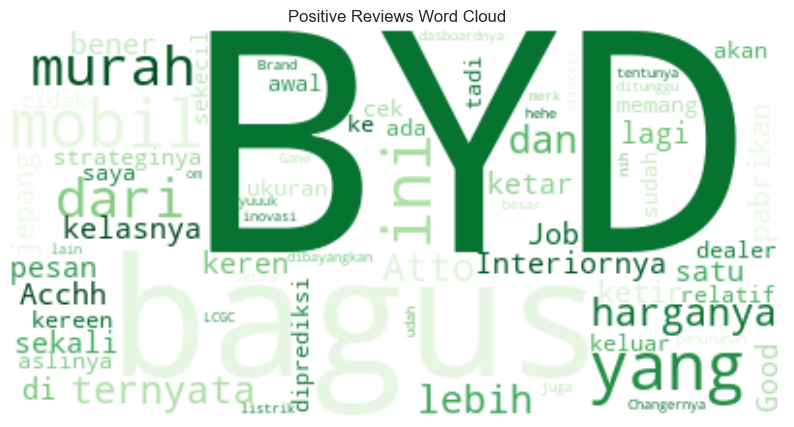

In [ ]:
# gabungkan semua komentar positif jadi satu string
positive_text = " ".join(positive_comments['Comment'].astype(str))

# buat wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Greens"
).generate(positive_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()


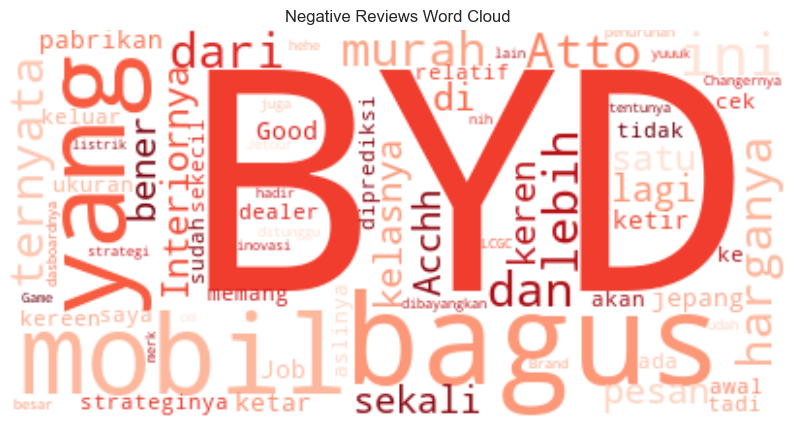

In [ ]:
# gabungkan semua komentar positif jadi satu string
negative_text = " ".join(negative_comments['Comment'].astype(str))


# buat wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    max_font_size=160,
    margin=0,
    background_color="white",
    colormap="Reds"
).generate(positive_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()
